# Analyze Palmer Penguins Dataset
### Task: Analyze the morphological differences among the three penguin species.

Author: Tabea Fry

Install necessary packages.

In [30]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset from Kaggle.

In [31]:
# Download latest version
path = kagglehub.dataset_download("samybaladram/palmers-penguin-dataset-extended")

print("Path to dataset files:", path)

Path to dataset files: /Users/tabeafry/.cache/kagglehub/datasets/samybaladram/palmers-penguin-dataset-extended/versions/2


Load the dataset into a Pandas DataFrame and display its summary statistics.

In [32]:
# Full path to the CSV file
csv_path = os.path.join(path, "palmerpenguins_original.csv")  # Replace with actual filename
# Load the dataset
df_palmerpenguins = pd.read_csv(csv_path)
df_palmerpenguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Display the first few rows of the DataFrame to understand its structure.

In [33]:
df_palmerpenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Identify the different species present.

In [34]:
df_palmerpenguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Examine the distribution of key features.

Text(0.5, 1.02, 'Pairplot of Palmer Penguins Dataset')

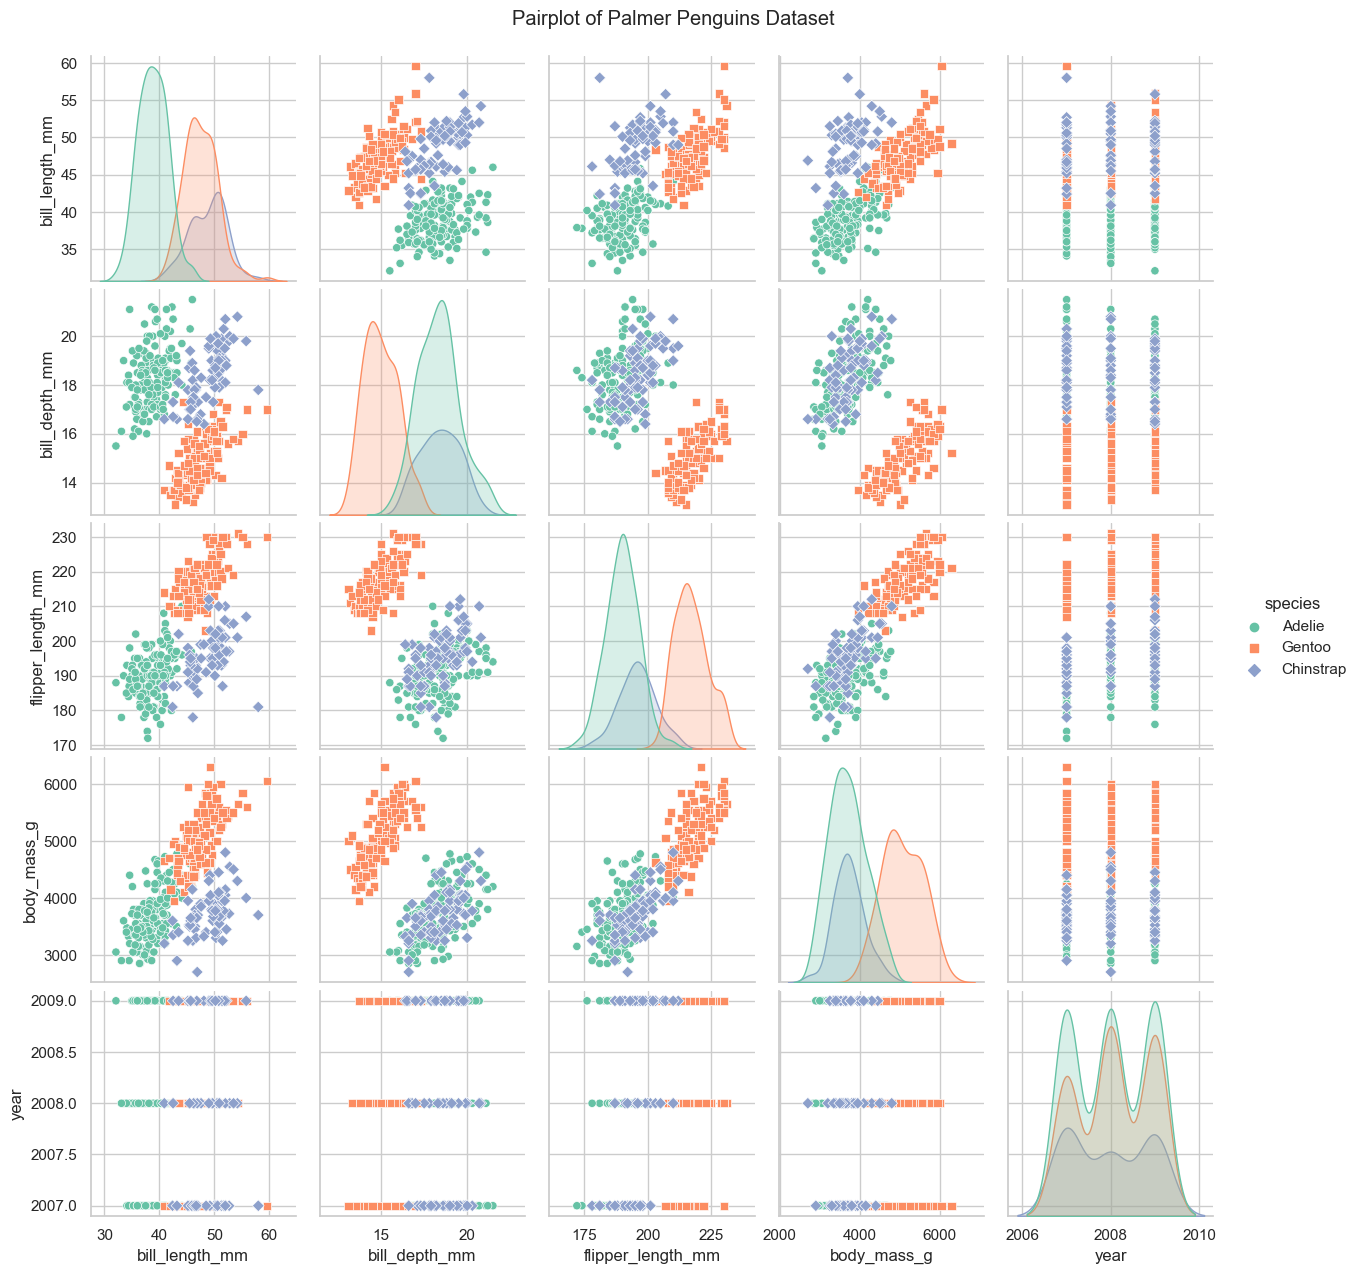

In [35]:
# Visualize the distribution of key features
sns.set(style="whitegrid")
# Create a pair plot to visualize the relationships between features
sns.pairplot(df_palmerpenguins, hue="species", markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Pairplot of Palmer Penguins Dataset", y=1.02)

Determine which features are most effective in distinguishing between species.

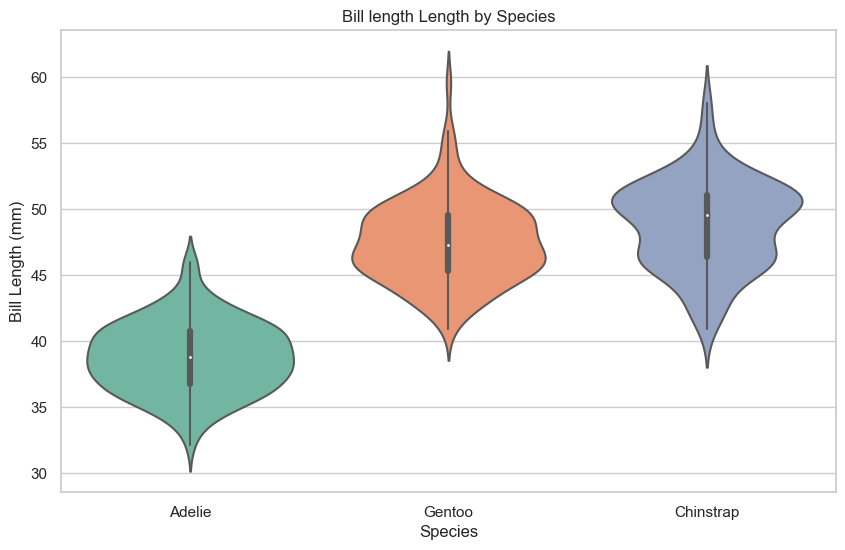

In [36]:
# Create a violin plot to visualize the distribution of bill length by species
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="bill_length_mm", data=df_palmerpenguins, palette="Set2")
plt.title("Bill length Length by Species")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.show()

Species Adelie has a shorter bill length compared to the other two species and is thus well distinguishable in this feature.

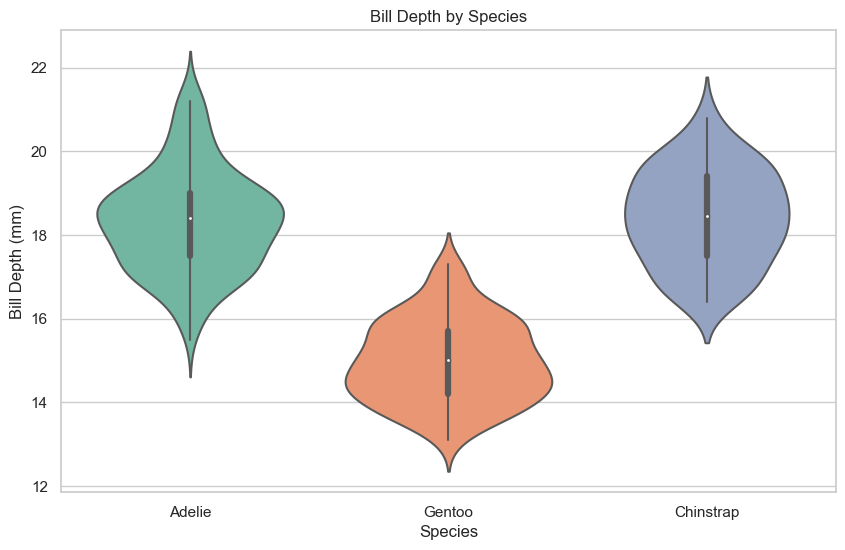

In [37]:
# Create a violin plot to visualize the distribution of bill depth by species
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="bill_depth_mm", data=df_palmerpenguins, palette="Set2")
plt.title("Bill Depth by Species")
plt.xlabel("Species")
plt.ylabel("Bill Depth (mm)")
plt.show()

Species Gentoo has a deeper bill compared to the other two species and is thus well distinguishable in this feature.

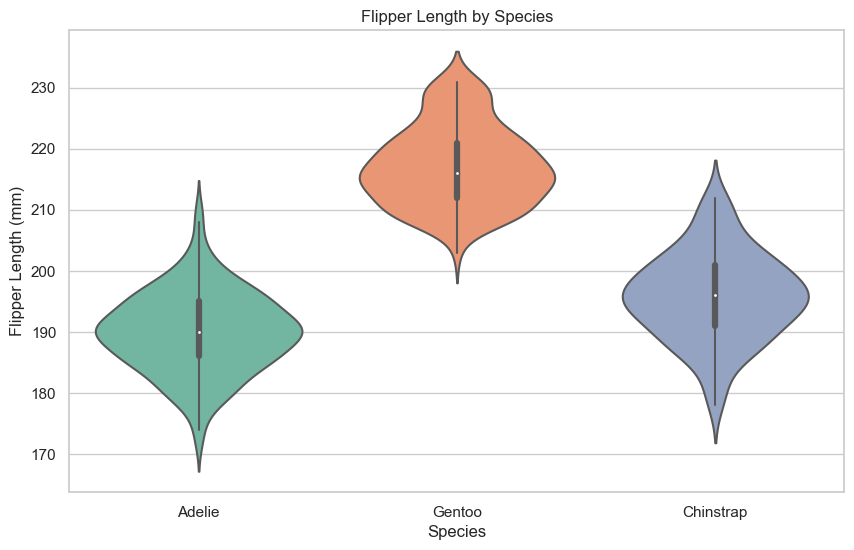

In [38]:
# Create a violin plot to visualize the distribution of flipper length by species
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="flipper_length_mm", data=df_palmerpenguins, palette="Set2")
plt.title("Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

Species Gentoo has a longer flipper length compared to the other two species and is thus well distinguishable in this feature.
Also the Adelie species has a slightly shorter flipper length compared to the Chinstrap species.

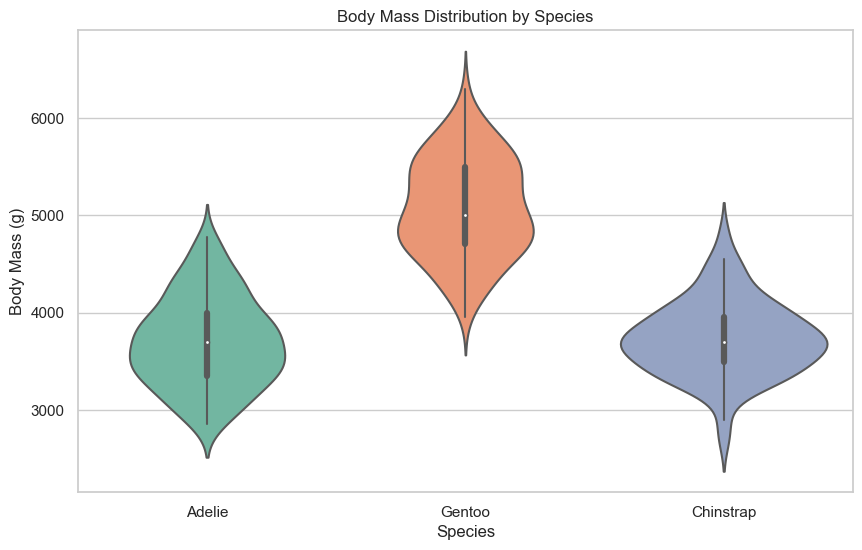

In [39]:
# Create a violin plot to visualize the distribution of body mass by species
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="body_mass_g", data=df_palmerpenguins, palette="Set2")
plt.title("Body Mass Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

Species Gentoo has a higher body mass compared to the other two species, while Adelie has a slightly lower body mass compared to Chinstrap.

From these plots, we can see that:
- **Bill Length**: The Adelie species has a shorter bill length compared to the Chinstrap and Gentoo species.
- **Bill Depth**: The Gentoo species has a deeper bill compared to the other two species.
- **Flipper Length**: The Gentoo species has a longer flipper length compared to the other two species. Also, the Adelie species has a notably shorter flipper length compared to the Chinstrap species.
- **Body Mass**: The Gentoo species has a higher body mass compared to the other two species, while Adelie has a lower body mass compared to Chinstrap.
- These morphological features (bill length, bill depth, flipper length, and body mass) are effective in distinguishing between the three penguin species in the dataset.

/var/folders/t_/s65wyw3x6s14tb20670jblyr0000gn/T/ipykernel_68364/2394755340.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_palmerpenguins.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})


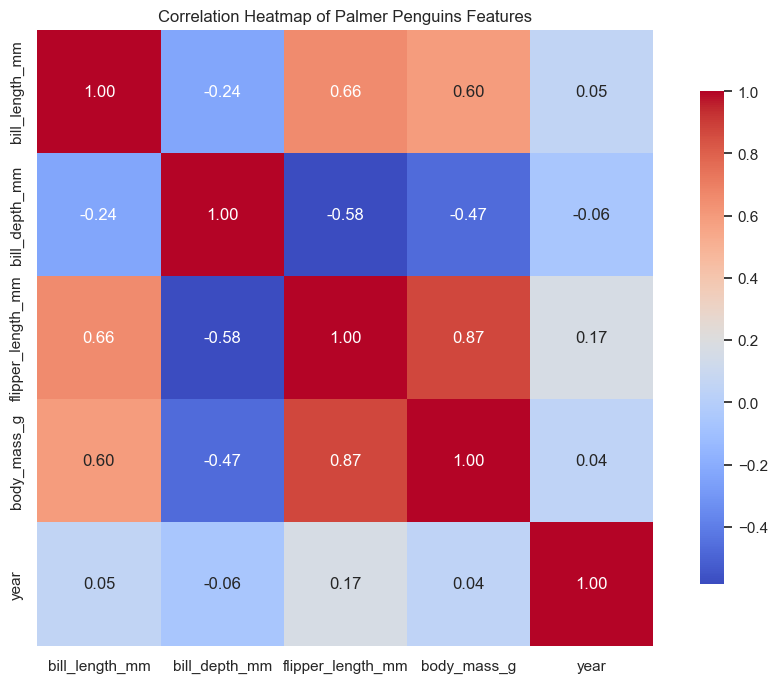

In [40]:
# create a plot to visualize potential correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df_palmerpenguins.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Palmer Penguins Features")
plt.show()

From the correlation heatmap, we can observe the following relationships:
- **Bill Length and Bill Depth**: There is a moderate positive correlation (0.61) between bill length and bill depth, indicating that as the bill length increases, the bill depth tends to increase as well.
- **Bill Length and Flipper Length**: There is a strong positive correlation (0.87) between bill length and flipper length, suggesting that penguins with longer bills also tend to have longer flippers.
- **Bill Length and Body Mass**: There is a moderate positive correlation (0.66) between bill length and body mass, indicating that penguins with longer bills tend to have higher body mass.
- **Bill Depth and Flipper Length**: There is a moderate positive correlation (0.58) between bill depth and flipper length, suggesting that penguins with deeper bills also tend to have longer flippers.
- **Bill Depth and Body Mass**: There is a moderate positive correlation (0.55) between bill depth and body mass, indicating that penguins with deeper bills tend to have higher body mass.
- **Flipper Length and Body Mass**: There is a strong positive correlation (0.87) between flipper length and body mass, suggesting that penguins with longer flippers tend to have higher body mass.
- Overall, these correlations suggest that the morphological features of penguins are interrelated, with longer bills and flippers generally associated with higher body mass.

The analysis of the Palmer Penguins dataset reveals significant morphological differences among the three penguin species: Adelie, Chinstrap, and Gentoo. The key findings are:
1. **Bill Length**: The Adelie species has a notably shorter bill length compared to the Chinstrap and Gentoo species. This morphological trait could be linked to dietary preferences or feeding strategies, as different bill lengths may be more suited for different types of prey.
2. **Bill Depth**: The Gentoo species exhibits a deeper bill compared to the other two species. This could suggest adaptations to different feeding habits or ecological niches, as a deeper bill may allow for more efficient foraging in certain environments.
3. **Flipper Length**: The Gentoo species has a longer flipper length compared to the other two species, which may enhance swimming efficiency and agility in the water. Additionally, the Adelie species has a slightly shorter flipper length compared to the Chinstrap species, indicating potential differences in swimming behavior or habitat preferences.
4. **Body Mass**: The Gentoo species has a higher body mass compared to the other two species, while the Adelie species has a lower body mass compared to the Chinstrap species. Body mass can be an important factor in survival and reproduction, influencing energy requirements and foraging strategies.
5. Overall, these morphological features (bill length, bill depth, flipper length, and body mass) are effective in distinguishing between the three penguin species in the dataset. The differences observed may be attributed to evolutionary adaptations to their respective environments and ecological niches.
6. The correlation analysis further supports these findings, revealing interrelated relationships between the morphological features. For instance, longer bills and flippers are generally associated with higher body mass, suggesting that these traits may have evolved together to enhance the penguins' survival and reproductive success in their specific habitats.
7. In conclusion, the morphological differences among the penguin species in the Palmer Penguins dataset highlight the importance of these traits in understanding species adaptation and ecological diversity. Further research could explore the ecological implications of these morphological differences and their impact on penguin behavior and survival strategies.
